In [8]:
import json
import pickle
from transformers import pipeline
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


# Classify Rants

In [2]:
classifier = pipeline(
    task="text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=1,
)


In [3]:
with open("./data/rants.txt", mode="r", encoding="utf-8") as fo:
    rants = fo.readlines()
    results = classifier(rants)
results = list(map(lambda x: x[0], results))


In [4]:
# print
pprint(results[:10])


[{'label': 'disapproval', 'score': 0.7654463052749634},
 {'label': 'anger', 'score': 0.6864376068115234},
 {'label': 'annoyance', 'score': 0.6925789713859558},
 {'label': 'annoyance', 'score': 0.5423777103424072},
 {'label': 'anger', 'score': 0.6457645893096924},
 {'label': 'annoyance', 'score': 0.4969838261604309},
 {'label': 'annoyance', 'score': 0.5424355864524841},
 {'label': 'disapproval', 'score': 0.7124095559120178},
 {'label': 'sadness', 'score': 0.42269274592399597},
 {'label': 'annoyance', 'score': 0.5182121396064758}]


# Save Results

In [5]:
# save results to file
json.dump(results, open("./data/results.json", mode="w", encoding="utf-8"))
pickle.dump(results, open("./data/results.pickle", mode="wb"))


# Convert to DataFrame


In [6]:
df = pd.DataFrame(results)


In [7]:
df.head()


,label,score
0,disapproval,0.765446
1,anger,0.686438
2,annoyance,0.692579
3,annoyance,0.542378
4,anger,0.645765


# Plot Results

In [10]:
if not os.path.exists("./plots/"):
    os.makedirs("./plots/")


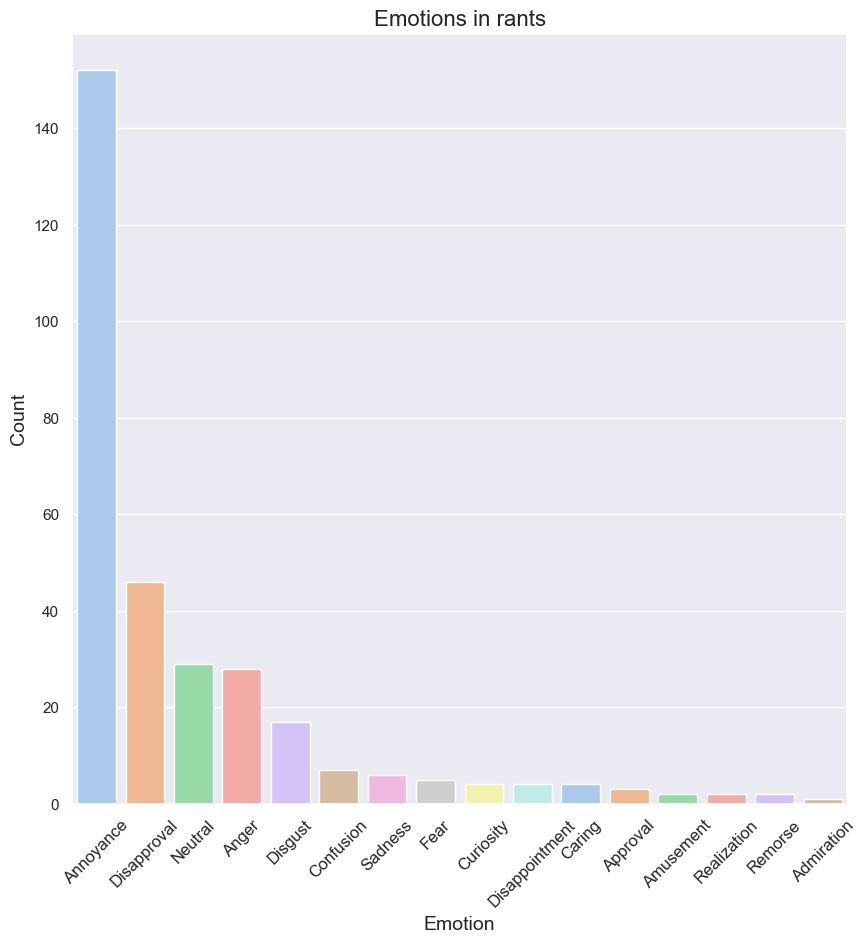

In [25]:
# barplot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.title("Emotions in rants", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
sns.barplot(
    x=df["label"].value_counts().index.str.title(),
    y=df["label"].value_counts(),
    palette="pastel",
    hue=df["label"].value_counts().index.str.title(),
    legend=False,
)
plt.savefig("./plots/barplot.png", dpi=300)
plt.show()
